# <a id='toc1_'></a>[Implementing Markowitz](#toc0_)
2nd week, 2nd section, Introduction to Portfolio Construction and Analysis with Python.
Vijay Vaidyanathan & Lionel Martellini.  
Notes and code written by Benoît MARION.

**Table of contents**<a id='toc0_'></a>    
- [Implementing Markowitz](#toc1_)    
  - [Lecture 1 - Fund Separation Theorem and the Capital Market Line](#toc1_1_)    
  - [Lecture 2 - Lack of robustness of Markowitz analysis](#toc1_2_)    
  - [Lab 1 - Finding the Maximum Sharpe Ratio Portfolio (MRS)](#toc1_3_)    
    - [Importing tool kit and data](#toc1_3_1_)    
    - [Obtaning the values of the MSR with our program](#toc1_3_2_)    
    - [Plotting the MSR by hand](#toc1_3_3_)    
    - [Plotting the MSR with our modified function (V2)](#toc1_3_4_)    
  - [Lab 2 - Lack of robustness of Markowitz Procedure and the GMV](#toc1_4_)    
    - [Importing tool kit and data](#toc1_4_1_)    
    - [Comparing the MSR weights with perfect information and with expected data](#toc1_4_2_)    
    - [Avoiding the errors on returns](#toc1_4_3_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## <a id='toc1_1_'></a>[Lecture 1 - Fund Separation Theorem and the Capital Market Line](#toc0_)
The introduction of a risk-free asset mkes the number of feasable portfolio becomes directly way higher and the efficient frontier becomes a strait line.   
  
When introduced, we can maximize the sharpe ratio of the feasable portfolios by finding the tengant of the frontier which crosses the y-axis at the risk-free point, we call it the tengency portfolio or the maximum sharpe ratio portfolio (MSR).   
  
This particular portfolio is the on that gives the maximum reward per unit of risk, without any investment on the risk-free asset which makes it quite interessting, but also it has no exposure to specific risks (only systemic risks).
$$ SR_p=\frac{\sum_{i=1}^N w_i \mu_i - r_f}{\sqrt{\sum^N_{i,j=1}w_iw_j\sigma_i \sigma_j \rho_{ij}}} $$


## <a id='toc1_2_'></a>[Lecture 2 - Lack of robustness of Markowitz analysis](#toc0_)
Estimation error is the key challenge in portfolio optimization. Often, the prefered asset by on optimizer is the one with estimation errors (high returns or low variance) and it leeds to "conerized" solution (only the most interesting asset).    
  
Empirics tend to show that the estimation errors are way bigger on the expected return side than on the volatility one and it is nearly impossible to get good expected returns estimators in the real world.
  
One option to avoid making mistakes on the returns estimators is to aim at the global minimum variance portfolio (GMV) which has had a lot of success in the recent years.

## <a id='toc1_3_'></a>[Lab 1 - Finding the Maximum Sharpe Ratio Portfolio (MRS)](#toc0_)

### <a id='toc1_3_1_'></a>[Importing tool kit and data](#toc0_)

In [1]:
import add_doc_path
import finance_pkg.Edhec_risk_kit as erk
import numpy as np
import pandas as pd

In [2]:
ind=erk.get_ind_returns()
er=erk.annualize_rets(ind["1996":"2000"],12)
cov=ind["1996":"2000"].cov()

### <a id='toc1_3_2_'></a>[Obtaning the values of the MSR with our program](#toc0_)

In [3]:
rf=0.1
w_msr=erk.msr(rf,er,cov)
r_msr=erk.portfolio_return(w_msr,er)
vol_msr=erk.portfolio_vol(w_msr,cov)

### <a id='toc1_3_3_'></a>[Plotting the MSR by hand](#toc0_)

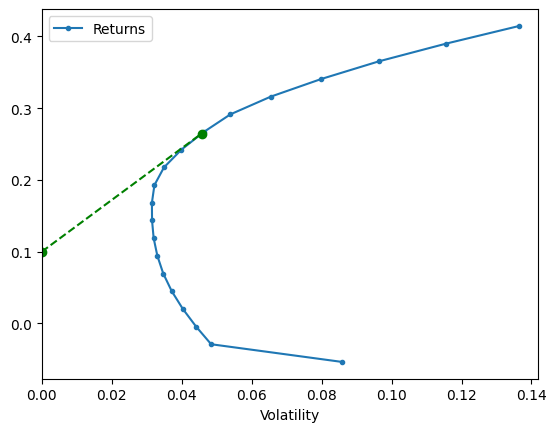

In [9]:
ax=erk.plot_ef(20,er, cov)
ax.set_xlim(left=0)

cml_x=[0,vol_msr]
cml_y=[rf,r_msr]
ax.plot(cml_x,cml_y,color="green",marker="o",linestyle="dashed")

### <a id='toc1_3_4_'></a>[Plotting the MSR with our modified function (V2)](#toc0_)

<AxesSubplot: xlabel='Volatility'>

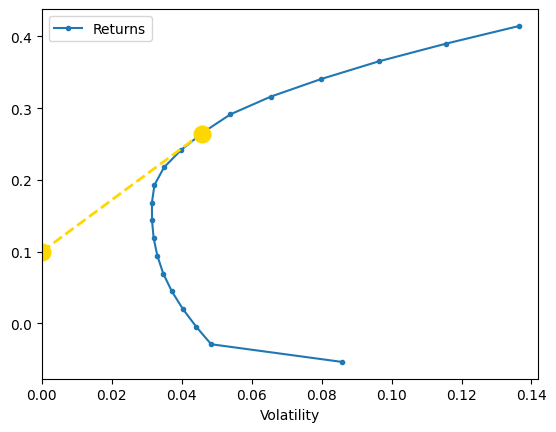

In [4]:
erk.plot_ef_v2(20,er, cov,show_cml=True, riskfree_rate=.1)

## <a id='toc1_4_'></a>[Lab 2 - Lack of robustness of Markowitz Procedure and the GMV](#toc0_)

### <a id='toc1_4_1_'></a>[Importing tool kit and data](#toc0_)

In [2]:
import add_doc_path

In [3]:
import finance_pkg.Edhec_risk_kit as erk
import numpy as np
import pandas as pd

ind=erk.get_ind_returns()
er=erk.annualize_rets(ind["1996":"2000"],12)
cov=ind["1996":"2000"].cov()

### <a id='toc1_4_2_'></a>[Comparing the MSR weights with perfect information and with expected data](#toc0_)

In [2]:
l=["Food","Steel"]
erk.msr(.1,er[l],cov.loc[l,l])

array([0.75040362, 0.24959638])

These weights would have been the best to use in 1996 to invest to maximize return and get the lowest volatility. However, in Jan. 1996 we would have know way to know the exact returns as we used in this scenerio. In this case we would have made guesses and forecasts about the expected returns. The annual realized returns for food and steel were 11.69% and 11.58% between 1996 and 2000. If we had made small errors in 1996, like forecasting 11% and 12% with the same volatility, what would have changed ?

In [6]:
erk.msr(.1,np.array([.11,.12]),cov.loc[l,l])

array([0.57930354, 0.42069646])

As we can se the portfolio drasticaly changes: from 75% to 58% for the first asset. A small change in returns changes in an important way the distribution.

In [7]:
erk.msr(.1,np.array([.10,.13]),cov.loc[l,l])

array([0., 1.])

If the error is higher (only 1.5 percentage points change) the portfolio weights are completly changed. The optimal portfolio according to Markowitz (MSR) seem to be very unrobost to small change in the data which is a big issue as data is very often subject to errors and imprecisions.

### <a id='toc1_4_3_'></a>[Avoiding the errors on returns](#toc0_)

The equally weighted portfolio (naive divesification) can also achieve to be unsubject to estimation errors on returns but won't be on the efficient frontier. We added it to the ef_plot function (V3) to represent it on the graph. 

<AxesSubplot: xlabel='Volatility'>

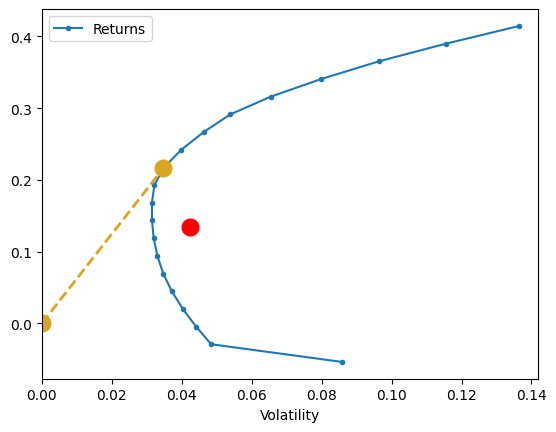

In [4]:
erk.plot_ef_v3(20,er,cov,show_cml=True,show_ew=True)

There is only one portfolio that is on the frontier and attainable without making guesses on returns and this one is the global minimum variance portfolio. We will try to represent it by modifying this plot function (still v3).

<AxesSubplot: xlabel='Volatility'>

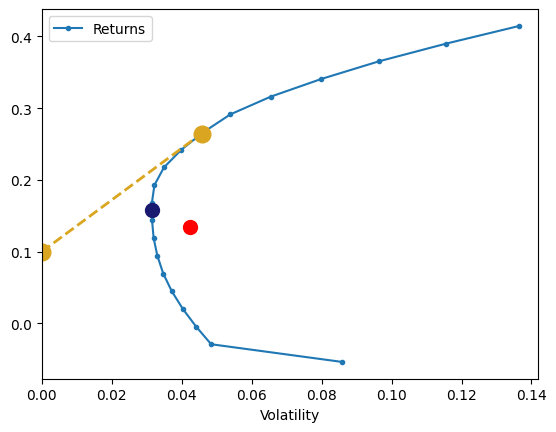

In [5]:
erk.plot_ef_v3(20,er,cov,show_cml=True,show_ew=True,show_gmv=True,riskfree_rate=.1)

Obtaining the GMV can be done with good estimates of variance which are far easier to get than good returns estimates.